Analysis of a regression problem using algorithms like Linear regression, Decision Tree, Random Forest and Support vector regressor and comparing the performance of the models and analysing the concepts of bias, variance, overfitting and underfitting.

### Step 1: Importing the Relevant Libraries

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

The data under analysis is a sales data for 1559 products across 10 stores in different cities. 
The data has 11 input variable and a target variable.

First the data is analysed to check the null values and correct datatypes.

In [77]:
train = pd.read_csv("train_v9rqX0R.csv")

In [78]:
train.shape

(8523, 12)

* __We have 8523 rows and 12 columns in Train data

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are some null values in the variables "Item_Weight" and "Outlet_Size".

In [80]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [81]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

In [82]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

* __We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

__3.1 Item Weight__

<AxesSubplot:xlabel='Item_Weight'>

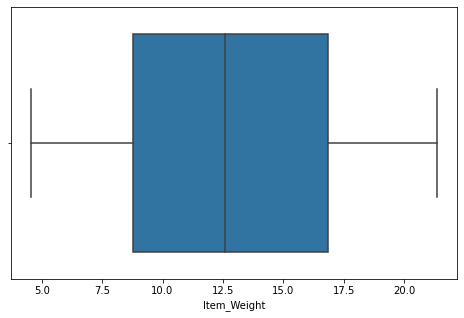

In [83]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

In [84]:
# Imputing with Mean
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [85]:
train['Item_Weight'].isnull().sum()

0

We have succesfully imputed the missing values from the column Item_Weight

__3.2 : Outlet Size__

In [86]:
train['Outlet_Size'].isnull().sum()

2410

In [87]:
print(train['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


As the missing values in Outlet_size is distributed in two Outlet_type categories " Grocery store and Supermarket type 1" 
So the missing values in outlet size under Grocery store and Supermarket Type1 are imputed as Small and Medium respectively.

In [88]:
pd.crosstab(train.Outlet_Size,train.Outlet_Type,dropna= False,margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,932,0,0,932
Medium,0,930,928,935,2793
Small,528,1860,0,0,2388
All,1083,5577,928,935,8523


In [89]:
b=train["Outlet_Type"] == "Grocery Store"
b

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Type, Length: 8523, dtype: bool

In [90]:
train.Outlet_Size[b==True] = train.Outlet_Size[b==True].fillna("Small")

In [91]:
pd.crosstab(train.Outlet_Size,train.Outlet_Type,dropna= False,margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,932,0,0,932
Medium,0,930,928,935,2793
Small,1083,1860,0,0,2943
All,1083,5577,928,935,8523


In [92]:
train["Outlet_Size"].fillna("Medium", axis = 0 , inplace=True)

In [93]:
pd.crosstab(train.Outlet_Size,train.Outlet_Type,dropna= False,margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,932,0,0,932
Medium,0,2785,928,935,4648
Small,1083,1860,0,0,2943
All,1083,5577,928,935,8523


In [94]:
train['Outlet_Size'].isnull().sum()

0

__We have succesfully imputed the missing values from the column Outlet_Size.__

In [95]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

To identify if there are any special or invalid values in the data, each variable is verified for unique values.

In [96]:
print(train['Item_Identifier'].unique(), train['Item_Weight'].unique(), train['Item_Fat_Content'].unique(), 
      train['Item_Visibility'].unique(),train['Item_Type'].unique(), train['Item_MRP'].unique(), 
      train['Outlet_Identifier'].unique(),train['Outlet_Establishment_Year'].unique(), train['Outlet_Size'].unique(),
      train['Outlet_Location_Type'].unique(),train['Outlet_Type'].unique(), train['Item_Outlet_Sales'].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] [ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       12.85764518 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         8.88       20.5
 13.5         

In [97]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [98]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [99]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

### Step 4: Data transformation

In [100]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])

* __Encoding the required columns from training dataset__

In [102]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [103]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [104]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (6818, 11)
X_test  (1705, 11)
y_train  (6818,)
y_test  (1705,)


In [105]:
###################
# Standardization - Input variable
###################

from sklearn.preprocessing import StandardScaler

Scaling = StandardScaler().fit(X_train)
x_train_std = Scaling.transform(X_train) # This step standardizes the train input data
x_test_std = Scaling.transform(X_test) # This step standardizes the test input data

X_train = pd.DataFrame(x_train_std, columns = X_train.columns)
X_test = pd.DataFrame(x_test_std, columns = X_test.columns)

In [106]:
# Changing the y_train and y_test data into 2D array to apply the scaling function
y_train_arr = y_train.values.reshape(-1,1)
y_test_arr = y_test.values.reshape(-1,1)
print (y_train_arr.shape, y_test_arr.shape)

(6818, 1) (1705, 1)


In [107]:
###################
# Standardization - Target variable
###################

Scaling = StandardScaler().fit(y_train_arr)
y_train_std = Scaling.transform(y_train_arr) # This step standardizes the train target data
y_test_std = Scaling.transform(y_test_arr) # This step standardizes the test target data


y_train = pd.DataFrame(y_train_std)
y_test = pd.DataFrame(y_test_std)
print (y_train.shape, y_test.shape)

(6818, 1) (1705, 1)


In [108]:
#converting the y_train and y_test data back into 1D array
y_train = y_train.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)
print (y_train.shape, y_test.shape)

(6818,) (1705,)


In [109]:
X_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03
mean,-5.066268e-17,4.640856e-17,-8.210244e-17,9.733585e-17,-2.250408e-17,2.066402e-16,-1.325168e-16,3.164872e-15,1.031573e-16,-7.653341e-17,-5.294403e-16
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-1.737004e+00,-1.951219e+00,-7.436902e-01,-1.278907e+00,-1.703889e+00,-1.775194e+00,-1.660361e+00,-1.533603e+00,-1.964044e+00,-1.363814e+00,-1.502954e+00
25%,-8.564179e-01,-8.305571e-01,-7.436902e-01,-7.586592e-01,-7.567127e-01,-7.548741e-01,-9.553072e-01,-1.294972e+00,-3.768861e-01,-1.363814e+00,-2.459446e-01
50%,5.218557e-03,9.678815e-03,-7.436902e-01,-2.393125e-01,-2.831247e-01,3.699592e-02,1.022731e-01,1.368157e-01,-3.768861e-01,-1.332047e-01,-2.459446e-01
75%,8.601670e-01,7.518324e-01,1.344646e+00,5.568437e-01,6.640512e-01,7.148322e-01,8.073266e-01,7.333938e-01,1.210272e+00,1.097404e+00,-2.459446e-01
max,1.736294e+00,2.015382e+00,1.344646e+00,5.048638e+00,1.848021e+00,2.036612e+00,1.512380e+00,1.329972e+00,1.210272e+00,1.097404e+00,2.268074e+00


### Step 5: Building Model

In [110]:
# Model Building with Linear regression algorithm
features= X.columns
LR = LinearRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_pred = LR.predict(X_test)
coef = pd.Series(LR.coef_,features).sort_values()

In [111]:
coef

Outlet_Size                 -0.128588
Outlet_Location_Type        -0.072281
Item_Visibility             -0.041970
Item_Identifier             -0.000614
Outlet_Establishment_Year    0.000718
Item_Weight                  0.001156
Item_Type                    0.004467
Item_Fat_Content             0.009794
Outlet_Identifier            0.110589
Outlet_Type                  0.378879
Item_MRP                     0.569358
dtype: float64

<AxesSubplot:>

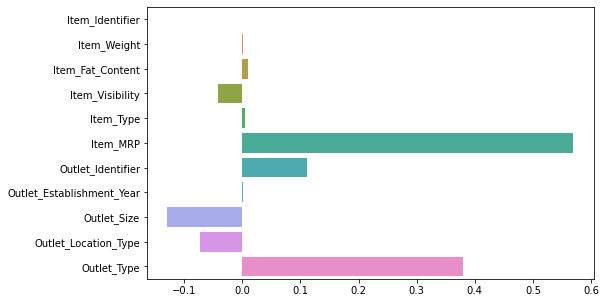

In [112]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

* __Item_MRP, Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [113]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6951123536973633
R Squared: 0.5168188157373116


In [114]:
# Calculating the test error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.7328753236446559
R Squared: 0.5017470862438616


RMSE score gives the root of mean of squared difference between the predicted and actual target values, so the lesser the RMSE better is the model, here it is about 73 percent which shows the poor performance of the model. 
R squared shows the predictive performance of the model related to the base prediction of calculating the mean values,
higher the R square, the model is good.
Here it is only 50 percent which shows the predictive performance of the model is low.
Training error and test error are almost same and they are high in the above model.
When both training and test error are high, it shows that the model is underfitting the data and the bias is more in the model.
When test error is higher than the training error it shows that the model is overfitting the data and the variance is more in the model, so the model fails to generalise to the new data.
In this above case the training error and the test error are similar and both are high, this shows that the model is underfitting.
The issue of underfitting can be overcome by increasing the complexity of the model or by reducing the size of the data.

Algorithms like Decision Tree, Random Forest and Support vector Regressor can be tried to check the performance of the models with these algorithms.

In [115]:
# Model Building with Decision Tree
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(random_state=123)
DT.fit(X_train,y_train)
y_train_pred = DT.predict(X_train)
y_pred = DT.predict(X_test)

In [116]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.0
R Squared: 1.0


In [117]:
# Calculating the testing error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.9450839067118084
R Squared: 0.17142774846143527


In Decision tree model the training error is 0, but the test error has increased very highly which shows that the model is overfitting the data and variance in the model is so high that the model failed to generalise to the new data.

In [118]:
from sklearn.ensemble import RandomForestRegressor

# Model Building Using Random Forest
RF = RandomForestRegressor(n_estimators = 100, max_features = 'auto', max_depth = 100, min_samples_split =10, 
                           min_samples_leaf= 4, random_state = 1)

RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_pred = RF.predict(X_test)


In [119]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.4377815003664634
R Squared: 0.8083473579368883


In [120]:
# Calculating the testing error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6956627153076078
R Squared: 0.5510612383498603


In Random forest model the training error is less, comparatively the test error has increased which shows that the model is slightly overfitting the data and the variance in the model is high that the model performance is low with the new data.

In [121]:
from sklearn.svm import SVR

# Model Building using support vector regressor
SVR = SVR(kernel='rbf')
SVR.fit(X_train,y_train)
y_train_pred = SVR.predict(X_train)
y_pred = SVR.predict(X_test)

In [122]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.604257329691508
R Squared: 0.6348730795140882


In [123]:
# Calculating the testing error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6871710374575167
R Squared: 0.5619543794842448


In SVR model both the training and test error are almost same and the R squared value is also similar, it shows that there is no issue of overfitting, but there might be an issue of underfitting where the model has not captured the pattern underlying the data.

To summarise, Linear regression and Support vector regressor model performances are similar and they have an issue of underfitting which can be improved by increasing the complexity of the model or by reducing the size of the data.
Where Decision tree is worse and Random forest is better but both have the issue of overfitting which can be reduced by increasing the size of the data.

To resolve the issue of underfitting, the number of variables included in the model can be reduced.
To include only the variables which are highly correlated to the target variable and removing the variables causing multicollinearity can improve the model.

### Step 7: Model Performance Analysis

In [124]:
train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.005383,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.005512,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000492,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.136452,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001582,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.005402,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.307955,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.185859,-0.089216,-0.122304,-0.049135
Outlet_Size,0.005383,-0.005512,-0.000492,0.136452,-0.001582,0.005402,0.307955,0.185859,1.000000,-0.471283,-0.346973,-0.193184
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.471283,1.000000,0.467219,0.089367


The varaibles "Item_MRP, Outlet_Type, Outlet_Size, Item Visibility, Outlet_Location_Type, Outlet_Identifier" are highly correalted with the target variable "Item_Outlet_Sales". 

Text(0.5, 1.0, 'Correlation between features')

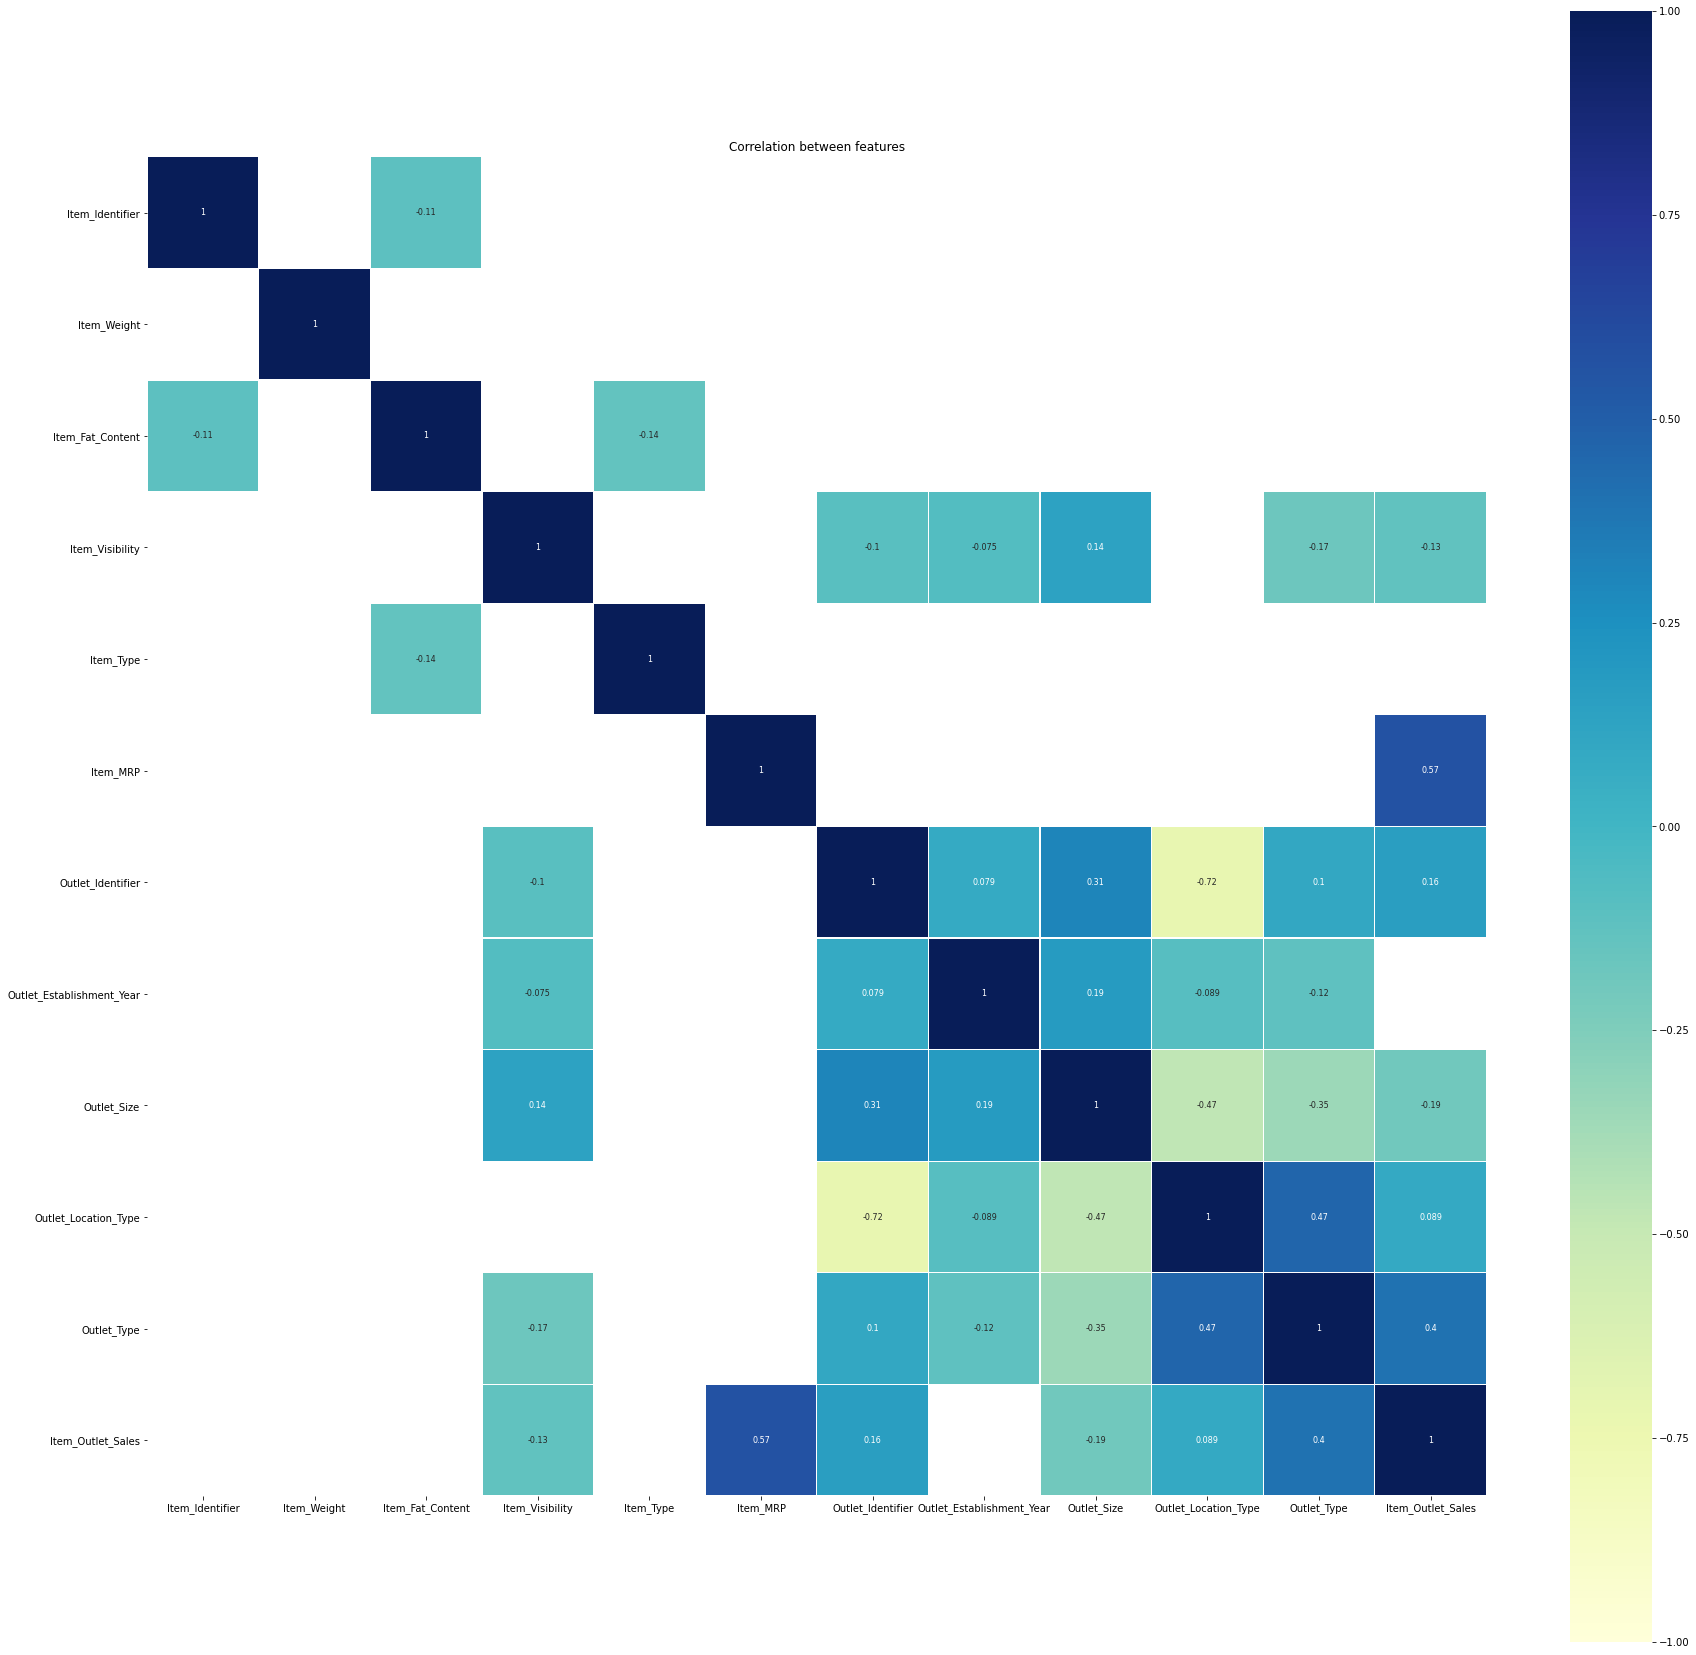

In [125]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=train.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.05) | (corr <= -0.05)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

From the correlation matrix we can find that there is some correlated input variables.
"Item_MRP" variable is not correlated with any input varaible and its correaltion with the target variable is high so it is an important variable to  be included in the model.
"Outlet type, Outlet_Size, Item Visibility, Outlet_Location_Type, Outlet_Identifier, Outlet_Establishment_Year" are correlated to each other and also to the target variable, so selecting one of these varaibles is sufficient.
So "Outlet_Type" variable which has the highest correlation with the target variable can be selected to be included in the model.

In [126]:
# Seperate Features and Target
X= train[['Item_MRP', 'Outlet_Type']]
y= train['Item_Outlet_Sales']
print(X.shape, y.shape)

(8523, 2) (8523,)


In [127]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (6818, 2)
X_test  (1705, 2)
y_train  (6818,)
y_test  (1705,)


In [128]:
###################
# Standardization
###################

from sklearn.preprocessing import StandardScaler

Scaling = StandardScaler().fit(X_train)
x_train_std = Scaling.transform(X_train) # This step standardizes the train input data
x_test_std = Scaling.transform(X_test) # This step standardizes the test input data

X_train = pd.DataFrame(x_train_std, columns = X_train.columns)
X_test = pd.DataFrame(x_test_std, columns = X_test.columns)
print (X_train.shape, X_test.shape)

(6818, 2) (1705, 2)


In [129]:
# Changing the y_train and y_test data into 2D array to apply the scaling function
y_train_arr = y_train.values.reshape(-1,1)
y_test_arr = y_test.values.reshape(-1,1)
print (y_train_arr.shape, y_test_arr.shape)

(6818, 1) (1705, 1)


In [130]:
###################
# Standardization - Target variable
###################

Scaling = StandardScaler().fit(y_train_arr)
y_train_std = Scaling.transform(y_train_arr) # This step standardizes the train target data
y_test_std = Scaling.transform(y_test_arr) # This step standardizes the test target data


y_train = pd.DataFrame(y_train_std)
y_test = pd.DataFrame(y_test_std)
print (y_train.shape, y_test.shape)

(6818, 1) (1705, 1)


In [131]:
#converting the y_train and y_test data back into 1D array
y_train = y_train.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)
print (y_train.shape, y_test.shape)

(6818,) (1705,)


In [132]:
# Model Building with Linear regression algorithm
LR = LinearRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_pred = LR.predict(X_test)

In [133]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.7171272277139007
R Squared: 0.48572853927137516


In [134]:
# Calculating the testing error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.7497832539183402
R Squared: 0.4784918234401825


Even reducing the number of variables in the model has not increased the performance of the model. As the number of records are still high, the model may not be complex enough to fit the data. If the records are reduced it might affect the quality of the data, so to increase the complexity of the model is one of the options. 
Complex algorithms like neural network can be used to improve the performance.

In [135]:
#Model Building with shallow neural network algorithm
from sklearn.neural_network import MLPRegressor
SNN = MLPRegressor()
SNN.fit(X_train,y_train)
y_train_pred = SNN.predict(X_train)
y_pred = SNN.predict(X_test)

In [136]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6230198060765029
R Squared: 0.6118463212363967


In [137]:
# Calculating the testing error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6754142530045003
R Squared: 0.57681516963042


In [138]:
#Model Building with deep neural network algorithm
from sklearn.neural_network import MLPRegressor
DNN = MLPRegressor(hidden_layer_sizes = [100]*5)
DNN.fit(X_train,y_train)
y_train_pred = DNN.predict(X_train)
y_pred = DNN.predict(X_test)

In [139]:
# Calculating the training error
MSE= metrics.mean_squared_error(y_train,y_train_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_train, y_train_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6214762119317339
R Squared: 0.6137673180029826


In [140]:
# Calculating the testing error
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
r_squared= metrics.r2_score(y_test, y_pred)
print("R Squared:",r_squared)

Root Mean Squared Error: 0.6776738093216685
R Squared: 0.5739789563791939


Even with a complex algorithm the performance of the prediction has not improved much, then this may not be an issue of underfitting, it can be due to the quality of the data.
When faced with a low performance model these analysis based on overfitting, underfitting, and complexity of the model can be done. When the quality of the data is good then using appropriate algorithm based on these analysis can help to produce a good preforming model.